In [0]:
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import pandas as pd 
import numpy as np 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn')
raw_boston_csv_url = 'https://raw.githubusercontent.com/pranjal3163/datascience/master/Boston.csv'
raw_boston_data = pd.read_csv(raw_boston_csv_url)
raw_boston_data.head()
#raw_boston_data.tail()

In [0]:
raw_boston_data = raw_boston_data.dropna()
raw_boston_csv_url = raw_boston_data.drop_duplicates()
list(raw_boston_data.columns)

In [0]:
rename_boston_data = raw_boston_data.rename(columns = {
 'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'
})
rename_boston_data.head()

In [0]:
rename_boston_data.info()

In [0]:
rename_boston_data.describe(include = [np.number]).T

In [0]:
X = rename_boston_data.drop('crimeRatePerCapita', axis = 1)
y = rename_boston_data[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)


In [0]:
# method must be either 'pearson', 'spearman', 'kendall'
corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

In [31]:
corrMatrix
#corrMatrix.describe(include=[np.number]).T



,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
landOver25K_sqft,1.000000,-0.640689,-0.083216,-0.634826,0.373586,-0.555230,0.603750,-0.264381,-0.389470,-0.467485,-0.523826,0.466663,-0.564959
non-retailLandProptn,-0.640689,1.000000,0.079860,0.797509,-0.416392,0.696736,-0.778680,0.457237,0.656127,0.445957,0.653095,-0.580487,0.715174
riverDummy,-0.083216,0.079860,1.000000,0.086770,0.064714,0.080791,-0.076507,0.052553,-0.017138,-0.104651,-0.026640,0.124943,0.044479
nitrixOxide_pp10m,-0.634826,0.797509,0.086770,1.000000,-0.304319,0.794049,-0.880900,0.584014,0.658260,0.409745,0.648475,-0.572275,0.814166
AvgNo.RoomsPerDwelling,0.373586,-0.416392,0.064714,-0.304319,1.000000,-0.293201,0.272158,-0.099303,-0.270574,-0.319895,-0.604930,0.605998,-0.298527
ProptnOwnerOccupied,-0.555230,0.696736,0.080791,0.794049,-0.293201,1.000000,-0.808187,0.424452,0.538012,0.374782,0.679643,-0.574321,0.710974
weightedDist,0.603750,-0.778680,-0.076507,-0.880900,0.272158,-0.808187,1.000000,-0.495093,-0.588344,-0.335794,-0.596062,0.470975,-0.738673
radialHighwaysAccess,-0.264381,0.457237,0.052553,0.584014,-0.099303,0.424452,-0.495093,1.000000,0.722368,0.329416,0.391349,-0.354644,0.746075
propTaxRate_per10K,-0.389470,0.656127,-0.017138,0.658260,-0.270574,0.538012,-0.588344,0.722368,1.000000,0.475045,0.538488,-0.575107,0.748108
pupilTeacherRatio,-0.467485,0.445957,-0.104651,0.409745,-0.319895,0.374782,-0.335794,0.329416,0.475045,1.000000,0.477545,-0.553821,0.492656


In [0]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x ='medianValue_Ks', y ='crimeRatePerCapita', ci = None, data = train_data, ax = ax, color='k', scatter_kws= {"s": 20,"color":"royalblue", "alpha":1})
ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()


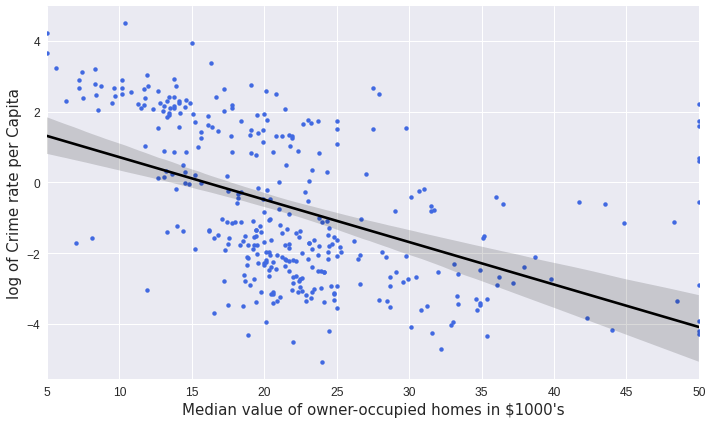

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
